In [1]:
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import StandardScaler
import keras
from keras import Sequential
from keras.layers import Dense
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from mlxtend.plotting import plot_decision_regions

In [5]:
dataset = []
def draw(event,x,y,flag,param):
    if event == cv2.EVENT_FLAG_LBUTTON:
        dataset.append((x,y,0))
        cv2.circle(img,(x,y),4,(255,0,0),-1)
    elif event == cv2.EVENT_FLAG_RBUTTON:
        dataset.append((x,y,1))
        cv2.circle(img,(x,y),4,(0,255,0),-1)
img = np.zeros((255,255,3),np.uint8)
cv2.namedWindow('dataset',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('dataset',draw)

while True:
    cv2.imshow('dataset',img)
    if cv2.waitKey(1) & 255 == ord('q'):
        break
cv2.destroyAllWindows()

dataset

[(6, 8, 0),
 (6, 23, 0),
 (15, 15, 0),
 (30, 7, 0),
 (22, 28, 0),
 (5, 35, 0),
 (14, 31, 0),
 (33, 19, 0),
 (22, 7, 0),
 (10, 46, 0),
 (22, 40, 0),
 (31, 35, 0),
 (42, 28, 0),
 (48, 18, 0),
 (45, 9, 0),
 (6, 57, 0),
 (20, 55, 0),
 (30, 49, 0),
 (38, 45, 0),
 (47, 36, 0),
 (57, 28, 0),
 (61, 15, 0),
 (7, 72, 0),
 (19, 64, 0),
 (37, 61, 0),
 (46, 52, 0),
 (56, 46, 0),
 (66, 33, 0),
 (82, 19, 0),
 (76, 24, 0),
 (74, 11, 0),
 (26, 67, 0),
 (22, 73, 0),
 (14, 79, 0),
 (1, 83, 0),
 (3, 127, 0),
 (7, 118, 0),
 (6, 104, 0),
 (15, 96, 0),
 (20, 109, 0),
 (26, 85, 0),
 (35, 97, 0),
 (45, 75, 0),
 (48, 86, 0),
 (54, 65, 0),
 (70, 49, 0),
 (67, 71, 0),
 (78, 59, 0),
 (84, 40, 0),
 (91, 22, 0),
 (98, 43, 0),
 (105, 24, 0),
 (101, 10, 0),
 (90, 54, 0),
 (58, 59, 0),
 (38, 87, 0),
 (182, 249, 1),
 (185, 237, 1),
 (188, 227, 1),
 (191, 216, 1),
 (195, 207, 1),
 (199, 202, 0),
 (201, 195, 1),
 (204, 188, 1),
 (208, 181, 1),
 (212, 174, 1),
 (215, 167, 1),
 (219, 160, 1),
 (223, 154, 1),
 (228, 150, 0),

In [7]:
df = pd.DataFrame(dataset)

In [8]:
df.to_csv(r'cv_dataset.csv')

In [13]:
# load dataset
df = pd.read_csv(r'cv_dataset.csv')

In [14]:
df.head()

,Unnamed: 0,0,1,2
0,0,6,8,0
1,1,6,23,0
2,2,15,15,0
3,3,30,7,0
4,4,22,28,0


In [18]:
df = df.drop('Unnamed: 0',axis = 1)

In [19]:
df.head()

,0,1,2
0,6,8,0
1,6,23,0
2,15,15,0
3,30,7,0
4,22,28,0


In [21]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [24]:
# train-test-split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [25]:
# data preprocessing
std = StandardScaler()
x_trainp = std.fit_transform(x_train)
x_testp = std.transform(x_test)

In [97]:
# creating neural network
model = Sequential()
model.add(Dense(10,activation="sigmoid",kernel_regularizer=L1(0.002),bias_regularizer=L1(0.001),input_dim=2))
model.add(Dense(5,activation="relu",kernel_regularizer=L1(0.002),bias_regularizer=L1(0.001)))
model.add(Dense(3,activation="relu",kernel_regularizer=L1(0.002),bias_regularizer=L1(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L1(0.002),bias_regularizer=L1(0.001)))

In [102]:
# model compilation
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.01),metrics=["accuracy"])
history = model.fit(x_trainp,y_train,batch_size=5,epochs=30,validation_split=0.1)

Epoch 1/30
36/36 [==============================] - 1s 7ms/step - loss: 0.3085 - accuracy: 0.9333 - val_loss: 0.3261 - val_accuracy: 0.9524
Epoch 2/30
36/36 [==============================] - 0s 3ms/step - loss: 0.3076 - accuracy: 0.9333 - val_loss: 0.3299 - val_accuracy: 0.9524
Epoch 3/30
36/36 [==============================] - 0s 3ms/step - loss: 0.3061 - accuracy: 0.9333 - val_loss: 0.3302 - val_accuracy: 0.9524
Epoch 4/30
36/36 [==============================] - 0s 3ms/step - loss: 0.3066 - accuracy: 0.9333 - val_loss: 0.3324 - val_accuracy: 0.9524
Epoch 5/30
36/36 [==============================] - 0s 3ms/step - loss: 0.3060 - accuracy: 0.9333 - val_loss: 0.3329 - val_accuracy: 0.9524
Epoch 6/30
36/36 [==============================] - 0s 3ms/step - loss: 0.3055 - accuracy: 0.9333 - val_loss: 0.3299 - val_accuracy: 0.9524
Epoch 7/30
36/36 [==============================] - 0s 3ms/step - loss: 0.3059 - accuracy: 0.9333 - val_loss: 0.3330 - val_accuracy: 0.9524
Epoch 8/30
36/36 [==

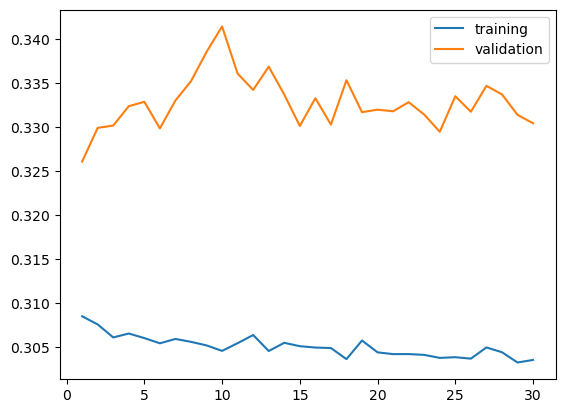

In [103]:
# train and validation loss
plt.plot(range(1,31),history.history["loss"],label="training")
plt.plot(range(1,31),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 12s 1ms/step


<Axes: >

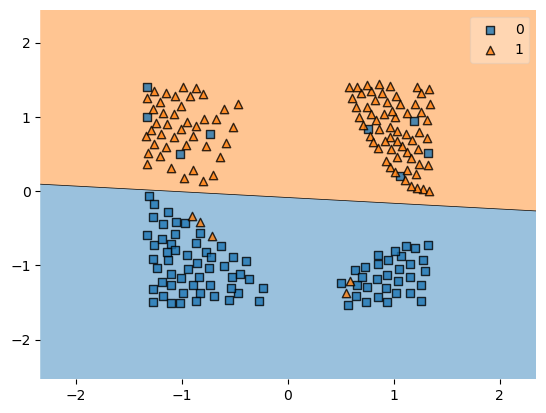

In [104]:
# decision surface on train data
plot_decision_regions(x_trainp,y_train.values,clf=model)

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

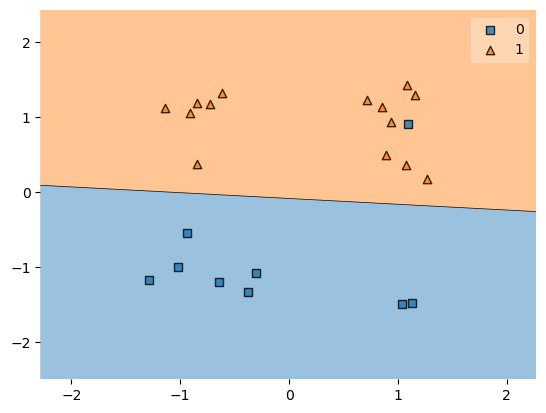

In [105]:
# decision surface on test data
plot_decision_regions(x_testp,y_test.values,clf=model)